<a href="https://colab.research.google.com/github/zpalevani/Capstone2/blob/main/Individual_Household_Electric_Power_Consumption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo
import urllib.request
import ssl
import certifi
import time

# Function to fetch data with retry mechanism
def fetch_data_with_retry(id, retries=3, delay=5):
    for attempt in range(retries):
        try:
            # fetch dataset
            individual_household_electric_power_consumption = fetch_ucirepo(id=id)
            return individual_household_electric_power_consumption
        except ConnectionError as e:
            print(f"Attempt {attempt + 1} failed: {e}")
            if attempt < retries - 1:
                print(f"Retrying in {delay} seconds...")
                time.sleep(delay)
            else:
                raise  # Re-raise the exception if all retries fail

# Fetch dataset with retry mechanism
individual_household_electric_power_consumption = fetch_data_with_retry(id=235)

# data (as pandas dataframes)
X = individual_household_electric_power_consumption.data.features
y = individual_household_electric_power_consumption.data.targets

# metadata
print(individual_household_electric_power_consumption.metadata)

# variable information
print(individual_household_electric_power_consumption.variables)

/usr/local/lib/python3.11/dist-packages/ucimlrepo/fetch.py:97: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_url)


{'uci_id': 235, 'name': 'Individual Household Electric Power Consumption', 'repository_url': 'https://archive.ics.uci.edu/dataset/235/individual+household+electric+power+consumption', 'data_url': 'https://archive.ics.uci.edu/static/public/235/data.csv', 'abstract': 'Measurements of electric power consumption in one household with a one-minute sampling rate over a period of almost 4 years. Different electrical quantities and some sub-metering values are available.', 'area': 'Physics and Chemistry', 'tasks': ['Regression', 'Clustering'], 'characteristics': ['Multivariate', 'Time-Series'], 'num_instances': 2075259, 'num_features': 9, 'feature_types': ['Real'], 'demographics': [], 'target_col': None, 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2006, 'last_updated': 'Fri Mar 08 2024', 'dataset_doi': '10.24432/C58K54', 'creators': ['Georges Hebrail', 'Alice Berard'], 'intro_paper': None, 'additional_info': {'summary': 'This archiv

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/household_power_consumption.txt', sep=';', parse_dates={'datetime': ['Date', 'Time']}, infer_datetime_format=True, low_memory=False, na_values=['?'])


<ipython-input-5-32bee54794b5>:4: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df = pd.read_csv('/content/household_power_consumption.txt', sep=';', parse_dates={'datetime': ['Date', 'Time']}, infer_datetime_format=True, low_memory=False, na_values=['?'])
<ipython-input-5-32bee54794b5>:4: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv('/content/household_power_consumption.txt', sep=';', parse_dates={'datetime': ['Date', 'Time']}, infer_datetime_format=True, low_memory=False, na_values=['?'])
<ipython-input-5-32bee54794b5>:4: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `da

In [ ]:
# Handle missing values
df = df.dropna()

# Select features for clustering
features = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']
X = df[features]


In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)


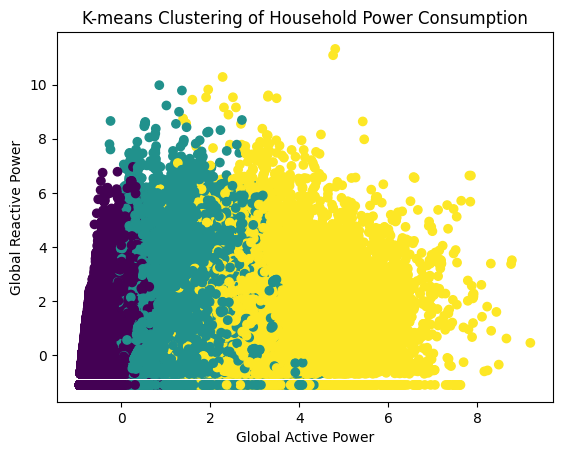

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='viridis')
plt.xlabel('Global Active Power')
plt.ylabel('Global Reactive Power')
plt.title('K-means Clustering of Household Power Consumption')
plt.show()


In [ ]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.transform import factor_cmap
import pandas as pd
import numpy as np

# Ensure output is displayed inside the notebook
output_notebook()

# Sample data (Replace with your actual clustered DataFrame)
# Assuming `df` contains: 'household_id', 'cluster_label', 'energy_usage'
df = pd.DataFrame({
    'household_id': np.arange(1, 101),  # 100 households
    'cluster_label': np.random.choice(['Low Users', 'Medium Users', 'High Users'], 100),
    'energy_usage': np.random.uniform(50, 500, 100)  # Random energy consumption
})

# Convert to Bokeh's ColumnDataSource
source = ColumnDataSource(df)

# Define color mapping for clusters
cluster_colors = {"Low Users": "blue", "Medium Users": "orange", "High Users": "red"}

# Create scatter plot
p = figure(title="Electricity Consumption Clusters",
           x_axis_label="Household ID",
           y_axis_label="Energy Usage (kWh)",
           tools="pan,wheel_zoom,box_zoom,reset,save")

# Add scatter plot points with color mapping
p.scatter(x="household_id", y="energy_usage",
          source=source,
          size=8,
          color=factor_cmap('cluster_label', palette=list(cluster_colors.values()), factors=list(cluster_colors.keys())),
          legend_field="cluster_label")

# Add Hover Tool for interactivity
hover = HoverTool(tooltips=[("Household ID", "@household_id"),
                             ("Cluster", "@cluster_label"),
                             ("Energy Usage (kWh)", "@energy_usage")])
p.add_tools(hover)

# Show the plot
show(p)


In [ ]:
from sklearn.cluster import KMeans

# Load the dataset (assuming it's the original dataset from previous cells)
# Replace with the actual path to your data if different
df = pd.read_csv('/content/household_power_consumption.txt', sep=';',
                 parse_dates={'datetime': ['Date', 'Time']},
                 infer_datetime_format=True, low_memory=False, na_values=['?'])

# Handle missing values
df = df.dropna()  # Ensure to drop missing values before applying KMeans

# Select features for clustering
features = ['Global_active_power', 'Global_reactive_power', 'Voltage',
            'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']

# Apply KMeans
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(df[features])

df[['datetime', 'cluster'] + features].head()

<ipython-input-10-110b45bccfcf>:5: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df = pd.read_csv('/content/household_power_consumption.txt', sep=';',
<ipython-input-10-110b45bccfcf>:5: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv('/content/household_power_consumption.txt', sep=';',
<ipython-input-10-110b45bccfcf>:5: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df = pd.read_csv('/content/household_power_consumption.txt', sep=';',


,datetime,cluster,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16 17:24:00,3,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,2006-12-16 17:25:00,3,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,2006-12-16 17:26:00,3,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,2006-12-16 17:27:00,3,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,2006-12-16 17:28:00,3,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [ ]:
from sklearn.cluster import KMeans

# Load the dataset (assuming it's the original dataset from previous cells)
# Replace with the actual path to your data if different
df = pd.read_csv('/content/household_power_consumption.txt', sep=';',
                 parse_dates={'datetime': ['Date', 'Time']},
                 infer_datetime_format=True, low_memory=False, na_values=['?'])

# Handle missing values
df = df.dropna()

# Select features for clustering
features = ['Global_active_power', 'Global_reactive_power', 'Voltage',
            'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']

# Apply KMeans
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(df[features])

df[['datetime', 'cluster'] + features].head()

<ipython-input-11-015718e8a053>:5: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df = pd.read_csv('/content/household_power_consumption.txt', sep=';',
<ipython-input-11-015718e8a053>:5: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv('/content/household_power_consumption.txt', sep=';',
<ipython-input-11-015718e8a053>:5: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df = pd.read_csv('/content/household_power_consumption.txt', sep=';',


,datetime,cluster,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16 17:24:00,3,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,2006-12-16 17:25:00,3,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,2006-12-16 17:26:00,3,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,2006-12-16 17:27:00,3,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,2006-12-16 17:28:00,3,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load Dataset
file_path = '/content/household_power_consumption.txt'  # Replace with actual path
df = pd.read_csv(file_path, sep=';', low_memory=False, na_values=['?'])
df['datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d/%m/%Y %H:%M:%S')
df.drop(['Date', 'Time'], axis=1, inplace=True)

# Convert to Numeric and Fill Missing Values
cols_to_numeric = ['Global_active_power', 'Global_reactive_power', 'Voltage',
                   'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']
df[cols_to_numeric] = df[cols_to_numeric].astype(float)
df.fillna(method='ffill', inplace=True)

# Normalize Numerical Features
scaler = StandardScaler()
df[cols_to_numeric] = scaler.fit_transform(df[cols_to_numeric])

# ------------------------ 2. K-MEANS CLUSTERING ------------------------
features = ['Global_active_power', 'Global_reactive_power', 'Voltage',
            'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(df[features])


<ipython-input-12-2db894fb34fb>:17: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)
